# Carga Librerias

In [1]:
# Librerias
import warnings
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px 

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA

from sklearn import svm
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [2]:
def plot_metrics(model, x, y, pred_y):
    print('R^2 score:\t', r2_score(y, pred_y))
    print('MSE:\t\t', mean_squared_error(y, pred_y))
    print('RMSE:\t\t', mean_squared_error(y, pred_y, squared=False))
    print('MAE:\t\t', mean_absolute_error(y, pred_y))

    fig, ax = plt.subplots(1)
    matplotlib.rc('figure', figsize=(15, 5))
    ax.plot(y)
    ax.plot(pred_y)

---
# Carga Datos

In [3]:
DATA_DIR = "C:/Users/NetRunner/OneDrive/UOC/Semestre 6/TFM/MultipleDatasets"

train_data_cut = pd.read_csv(f"{DATA_DIR}/train_data.csv")
test_data_cut = pd.read_csv(f"{DATA_DIR}/test_data.csv")

train_data_uncut = pd.read_csv(f"{DATA_DIR}/train_data_uncut.csv")
test_data_uncut = pd.read_csv(f"{DATA_DIR}/test_data_uncut.csv")

# X_train = pd.read_csv(f"{DATA_DIR}/X_train.csv")
# y_train = pd.read_csv(f"{DATA_DIR}/y_train.csv")
# X_test = pd.read_csv(f"{DATA_DIR}/X_test.csv")
# y_test = pd.read_csv(f"{DATA_DIR}/y_test.csv")

In [4]:
data_cut = pd.concat([train_data_cut, test_data_cut])
data_uncut = pd.concat([train_data_uncut, test_data_uncut])

features = ['volt', 'rotate', 'pressure', 'vibration', 'error1', 'error2', 'error3',
           'error4', 'error5', 'volt_3h_mean', 'rotate_3h_mean',
           'pressure_3h_mean', 'vibration_3h_mean', 'volt_24h_mean',
           'rotate_24h_mean', 'pressure_24h_mean', 'vibration_24h_mean',
           'error1_count', 'error2_count', 'error3_count', 'error4_count',
           'error5_count']
label = ['RUL']

data_cut = data_cut[features+label]
data_uncut = data_uncut[features+label]

## Normalización de datos MinMax

In [5]:
feature_scaler_cut = MinMaxScaler(feature_range=(0,1))
label_scaler_cut = MinMaxScaler(feature_range=(0,1))
## Normalización de datos MinMax
feature_scaler_cut.fit(data_cut[features])
label_scaler_cut.fit(data_cut[label].values.reshape(-1,1))

MinMaxScaler()

In [6]:
feature_scaler_uncut = MinMaxScaler(feature_range=(0,1))
label_scaler_uncut = MinMaxScaler(feature_range=(0,1))

feature_scaler_uncut.fit(data_uncut[features])
label_scaler_uncut.fit(data_uncut[label].values.reshape(-1,1))

MinMaxScaler()

In [7]:
data_norm_cut = data_cut.copy()
data_norm_cut[features] = feature_scaler_cut.transform(data_cut[features])
data_norm_cut[label] = label_scaler_cut.transform(data_cut[label].values.reshape(-1,1))

data_norm_uncut = data_uncut.copy()
data_norm_uncut[features] = feature_scaler_uncut.transform(data_uncut[features])
data_norm_uncut[label] = label_scaler_uncut.transform(data_uncut[label].values.reshape(-1,1))

## Dataset Train/Test

In [8]:
train_norm_cut = data_norm_cut[:len(train_data_cut)]
test_norm_cut = data_norm_cut[len(train_data_cut):(len(train_data_cut)+len(test_data_cut))]

X_train_cut = train_norm_cut.loc[:, train_norm_cut.columns != 'RUL']
y_train_cut = train_norm_cut['RUL']
X_test_cut = test_norm_cut.loc[:, test_norm_cut.columns != 'RUL']
y_test_cut = test_norm_cut['RUL']

print('X_train:\t', X_train_cut.shape)
print('y_train:\t', y_train_cut.shape)
print('X_test:\t\t', X_test_cut.shape)
print('y_test:\t\t', y_test_cut.shape)

X_train:	 (17280, 22)
y_train:	 (17280,)
X_test:		 (3600, 22)
y_test:		 (3600,)


In [9]:
train_norm_uncut = data_norm_uncut[:len(train_data_uncut)]
test_norm_uncut = data_norm_uncut[len(train_data_uncut):(len(train_data_uncut)+len(test_data_uncut))]

X_train_uncut = train_norm_uncut.loc[:, train_norm_uncut.columns != 'RUL']
y_train_uncut = train_norm_uncut['RUL']
X_test_uncut = test_norm_uncut.loc[:, test_norm_uncut.columns != 'RUL']
y_test_uncut = test_norm_uncut['RUL']

print('X_train_uncut:\t', X_train_uncut.shape)
print('y_train_uncut:\t', y_train_uncut.shape)
print('X_test_uncut:\t', X_test_uncut.shape)
print('y_test_uncut:\t', y_test_uncut.shape)

X_train_uncut:	 (40397, 22)
y_train_uncut:	 (40397,)
X_test_uncut:	 (8305, 22)
y_test_uncut:	 (8305,)


---
# Control/Swap de variables
  
Esta celda sirve para pasar de los datos con ciclos homogenizados al conjunto entero con todos los ciclos sin homogenizar

In [10]:
# Cut cycles
# X_train = X_train_cut
# y_train = y_train_cut
# X_test = X_test_cut
# y_test = y_test_cut

# Uncut cycles
X_train = X_train_uncut
y_train = y_train_uncut
X_test = X_test_uncut
y_test = y_test_uncut


---
# Linear Regression

In [11]:
model_lr = LinearRegression().fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)

R^2 score:	 -0.3417596990206453
MSE:		 0.01738326444709191
RMSE:		 0.1318456083724138
MAE:		 0.11498906662178891


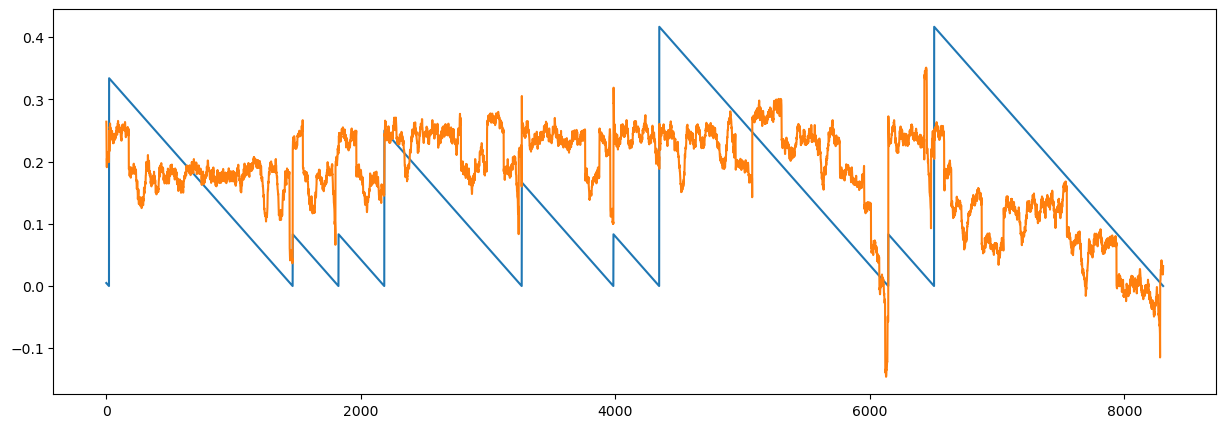

In [31]:
plot_metrics(model_lr, X_test, y_test, pred_lr)

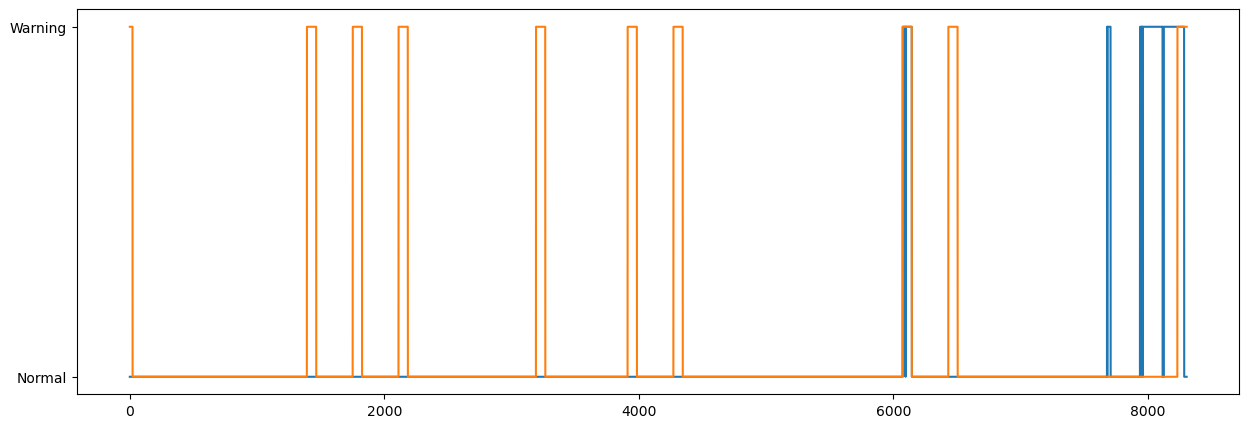

In [13]:
pred_lr_inv = label_scaler_uncut.inverse_transform(pred_lr.reshape(-1, 1))
y_test_uncut_inv = label_scaler_uncut.inverse_transform(y_test_uncut.values.reshape(-1, 1))

y_test_uncut_inv_class = ['Normal' if x >= 72 else 'Warning' for x in y_test_uncut_inv]
pred_lr_inv_class = ['Normal' if x >= 72 else 'Warning' for x in pred_lr_inv]

plt.plot(pred_lr_inv_class)
plt.plot(y_test_uncut_inv_class)

Accuracy:  0.8956050571944612


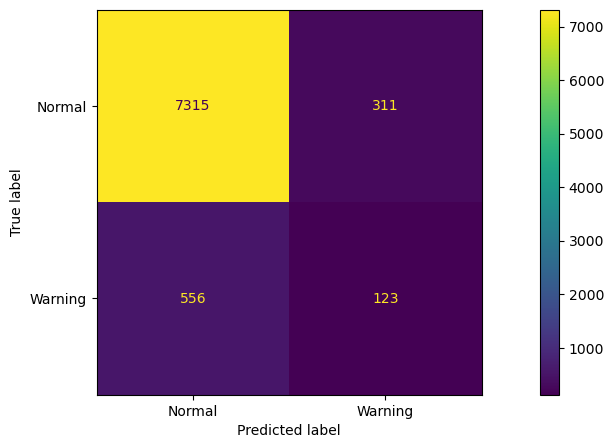

In [14]:
lr_cm = confusion_matrix(y_test_uncut_inv_class, pred_lr_inv_class)

print('Accuracy: ', accuracy_score(y_test_uncut_inv_class, pred_lr_inv_class))
ConfusionMatrixDisplay(lr_cm, display_labels=['Normal', 'Warning']).plot()

---
# SVM Regressor

In [15]:
model_svm = svm.SVR().fit(X_train, y_train)
pred_svm = model_svm.predict(X_test)

R^2 score:	 -0.34539030978143326
MSE:		 0.017430301086368897
RMSE:		 0.1320238655939482
MAE:		 0.10928270905289356


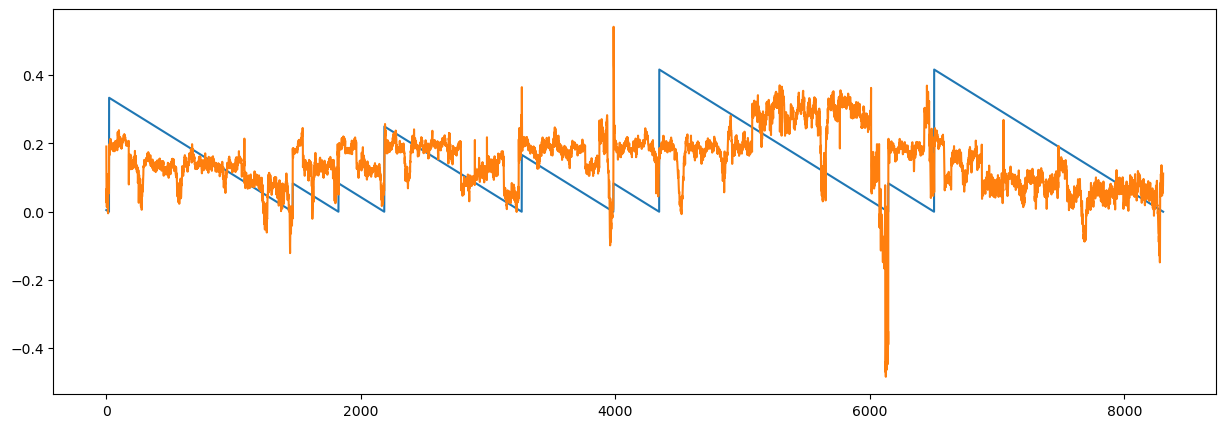

In [16]:
plot_metrics(model_svm, X_test, y_test, pred_svm)

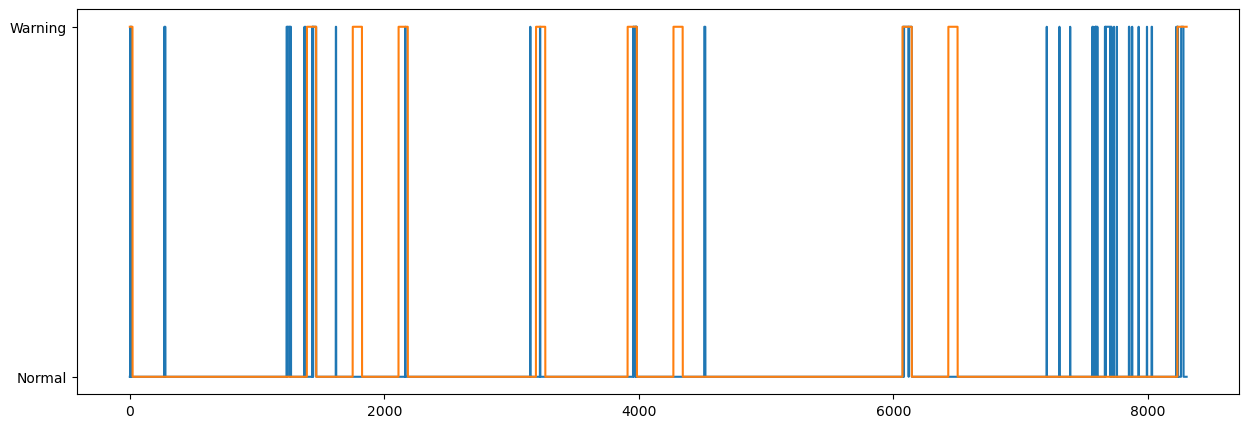

In [17]:
pred_svm_inv = label_scaler_uncut.inverse_transform(pred_svm.reshape(-1, 1))
y_test_uncut_inv = label_scaler_uncut.inverse_transform(y_test_uncut.values.reshape(-1, 1))

y_test_uncut_inv_class = ['Normal' if x >= 72 else 'Warning' for x in y_test_uncut_inv]
pred_svm_inv_class = ['Normal' if x >= 72 else 'Warning' for x in pred_svm_inv]

plt.plot(pred_svm_inv_class)
plt.plot(y_test_uncut_inv_class)

Accuracy:  0.921733895243829


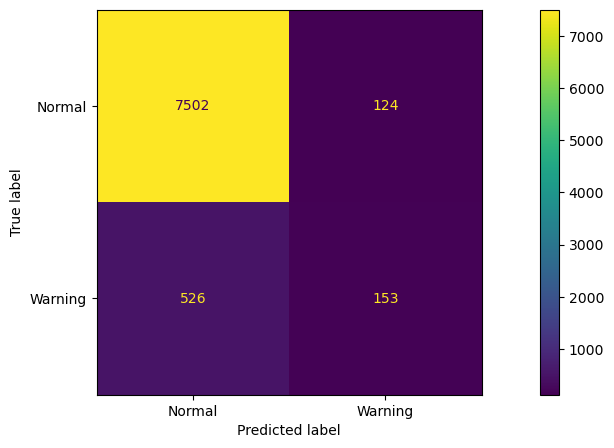

In [18]:
svm_cm = confusion_matrix(y_test_uncut_inv_class, pred_svm_inv_class)

print('Accuracy: ', accuracy_score(y_test_uncut_inv_class, pred_svm_inv_class))
ConfusionMatrixDisplay(svm_cm, display_labels=['Normal', 'Warning']).plot()

---
# Random Forest Regressor

In [19]:
model_rf = RandomForestRegressor().fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)

R^2 score:	 -0.31468932628535895
MSE:		 0.01703255228284797
RMSE:		 0.13050882070897726
MAE:		 0.10241233679111897


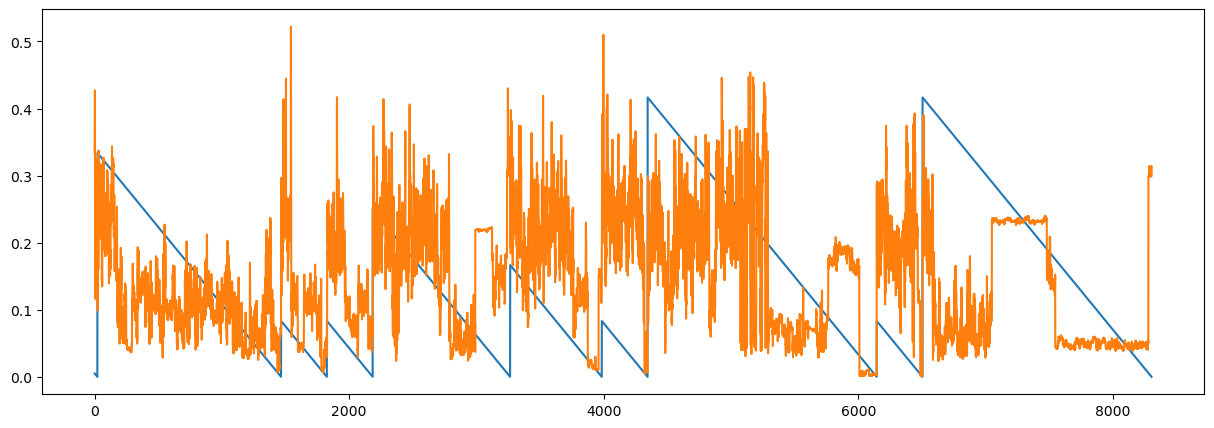

In [20]:
plot_metrics(model_rf, X_test, y_test, pred_rf)

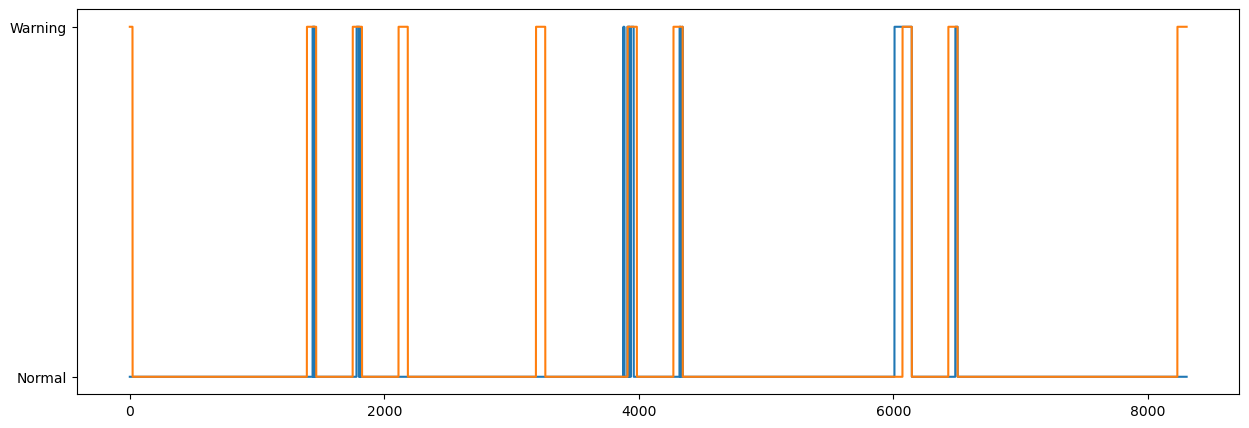

In [21]:
pred_rf_inv = label_scaler_uncut.inverse_transform(pred_rf.reshape(-1, 1))
y_test_uncut_inv = label_scaler_uncut.inverse_transform(y_test_uncut.values.reshape(-1, 1))

y_test_uncut_inv_class = ['Normal' if x >= 72 else 'Warning' for x in y_test_uncut_inv]
pred_rf_inv_class = ['Normal' if x >= 72 else 'Warning' for x in pred_rf_inv]
plt.plot(pred_rf_inv_class)
plt.plot(y_test_uncut_inv_class)

Accuracy:  0.9308850090307044


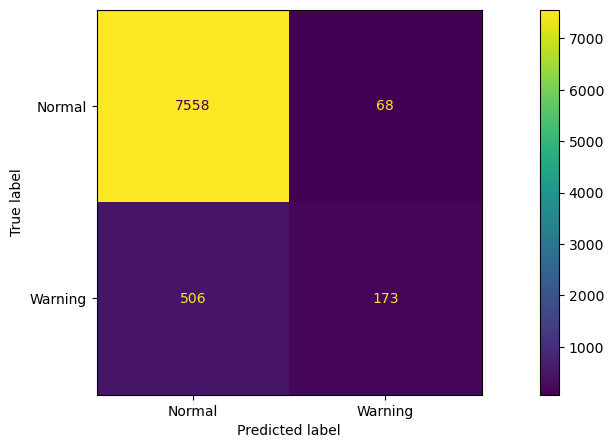

In [22]:
rf_cm = confusion_matrix(y_test_uncut_inv_class, pred_rf_inv_class)

print('Accuracy: ', accuracy_score(y_test_uncut_inv_class, pred_rf_inv_class))
ConfusionMatrixDisplay(rf_cm, display_labels=['Normal', 'Warning']).plot()

---
# Gradient boosting Regressor

In [23]:
model_gb = GradientBoostingRegressor().fit(X_train, y_train)
pred_gb = model_gb.predict(X_test)

R^2 score:	 -0.13000264668589678
MSE:		 0.014639830699634442
RMSE:		 0.12099516808383069
MAE:		 0.09888340438051137


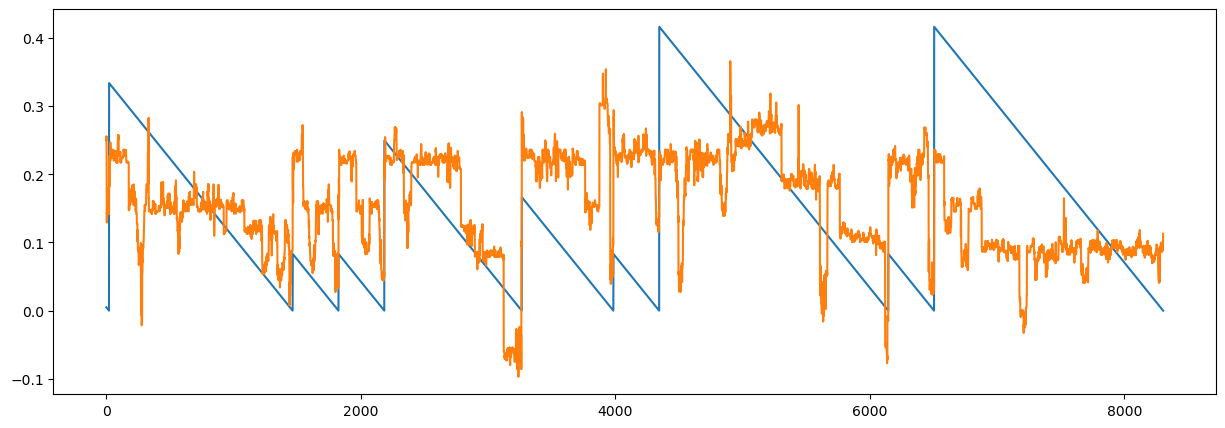

In [24]:
plot_metrics(model_gb, X_test, y_test, pred_gb)

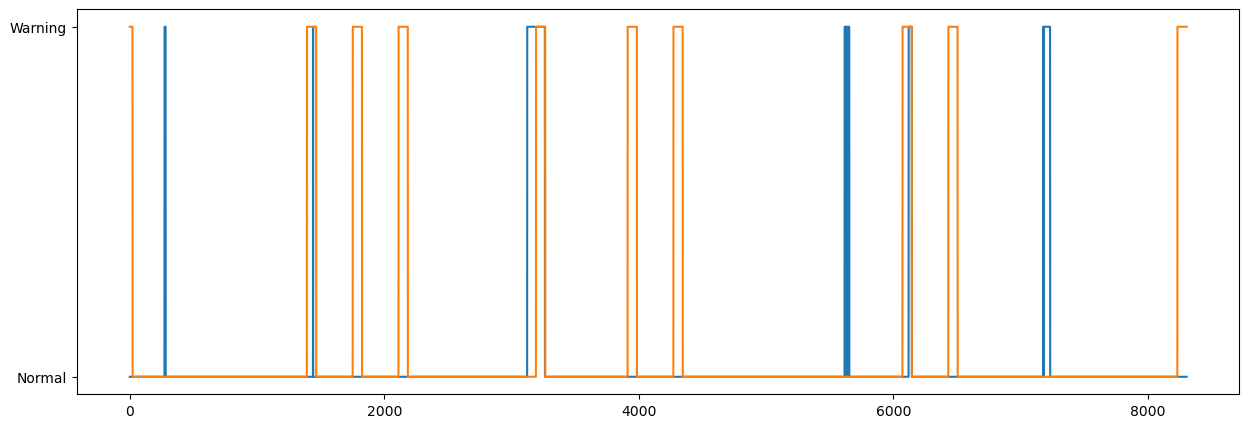

In [25]:
pred_gb_inv = label_scaler_uncut.inverse_transform(pred_gb.reshape(-1, 1))
y_test_uncut_inv = label_scaler_uncut.inverse_transform(y_test_uncut.values.reshape(-1, 1))

y_test_uncut_inv_class = ['Normal' if x >= 72 else 'Warning' for x in y_test_uncut_inv]
pred_gb_inv_class = ['Normal' if x >= 72 else 'Warning' for x in pred_gb_inv]

plt.plot(pred_gb_inv_class)
plt.plot(y_test_uncut_inv_class)

Accuracy:  0.9111378687537628


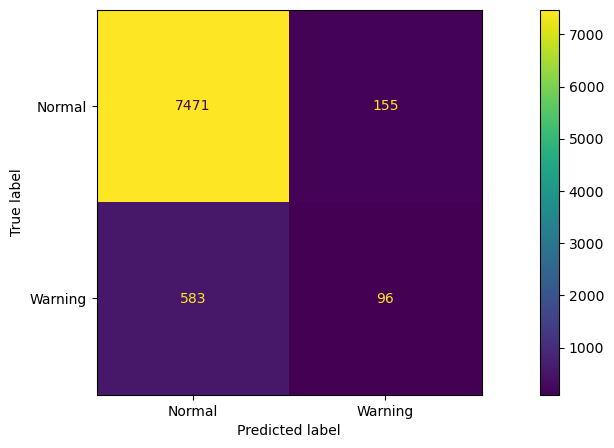

In [26]:
gb_cm = confusion_matrix(y_test_uncut_inv_class, pred_gb_inv_class)

print('Accuracy: ', accuracy_score(y_test_uncut_inv_class, pred_gb_inv_class))
ConfusionMatrixDisplay(gb_cm, display_labels=['Normal', 'Warning']).plot()

---
# XGBoosting Regressor

In [27]:
model_xgb = XGBRegressor().fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_test)

R^2 score:	 -0.27624943071824615
MSE:		 0.016534541446444513
RMSE:		 0.1285867078917744
MAE:		 0.10582049116988894


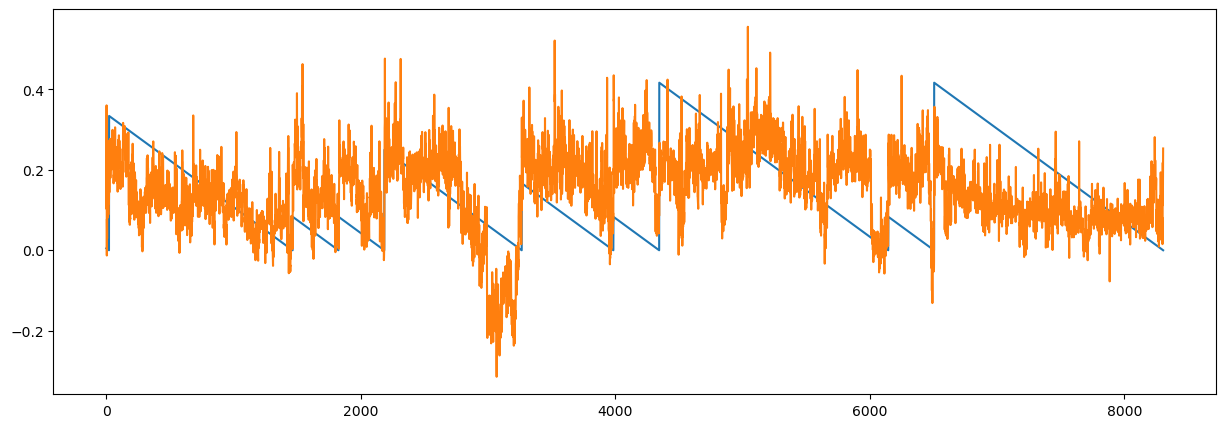

In [28]:
plot_metrics(model_xgb, X_test, y_test, pred_xgb)

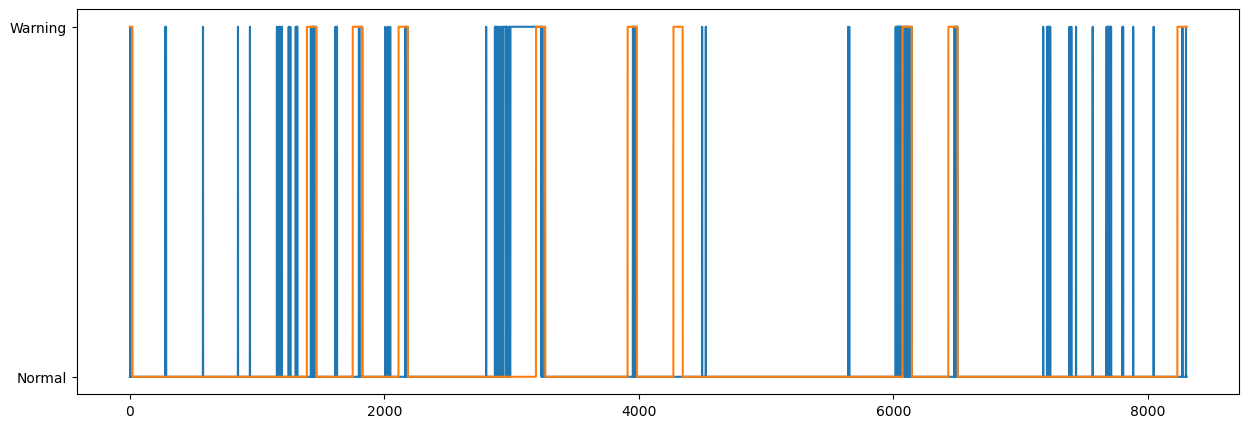

In [29]:
pred_xgb_inv = label_scaler_uncut.inverse_transform(pred_xgb.reshape(-1, 1))
y_test_uncut_inv = label_scaler_uncut.inverse_transform(y_test_uncut.values.reshape(-1, 1))

y_test_uncut_inv_class = ['Normal' if x >= 72 else 'Warning' for x in y_test_uncut_inv]
pred_xgb_inv_class = ['Normal' if x >= 72 else 'Warning' for x in pred_xgb_inv]

plt.plot(pred_xgb_inv_class)
plt.plot(y_test_uncut_inv_class)

Accuracy:  0.8912703190848886


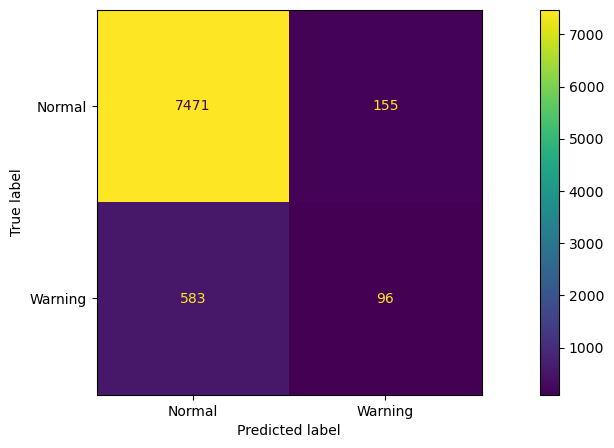

In [30]:
xgb_cm = confusion_matrix(y_test_uncut_inv_class, pred_xgb_inv_class)

print('Accuracy: ', accuracy_score(y_test_uncut_inv_class, pred_xgb_inv_class))
ConfusionMatrixDisplay(gb_cm, display_labels=['Normal', 'Warning']).plot()